In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import time
import pandas as pd

mingw_bin = "C:/msys64/mingw64/bin"
os.add_dll_directory(mingw_bin)
import ctypes
lin = ctypes.cdll.LoadLibrary("./cmake-build-release/liblinear_model.dll")

lin.create_linear_model.argtypes = [ctypes.c_int32]
lin.create_linear_model.restype = ctypes.c_void_p

lin.predict_linear_model.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_float)]
lin.predict_linear_model.restype = ctypes.c_float

lin.release_linear_model.argtypes = [ctypes.c_void_p]
lin.release_linear_model.restype = None

lin.train_linear_model.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_float), ctypes.POINTER(ctypes.c_float), ctypes.c_int32, ctypes.c_float, ctypes.c_int32]
lin.train_linear_model.restype = None

lin.create_ovo_classifier.argtypes = [ctypes.c_int32]
lin.create_ovo_classifier.restype = ctypes.c_void_p

lin.train_ovo_classifier.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_float), ctypes.POINTER(ctypes.c_int32), ctypes.c_int32, ctypes.c_int32, ctypes.c_float]
lin.train_ovo_classifier.restype = None

lin.predict_ovo_classifier.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_float)]
lin.predict_ovo_classifier.restype = ctypes.c_int32

lin.release_ovo_classifier.argtypes = [ctypes.c_void_p]
lin.release_ovo_classifier.restype = None

mlp = ctypes.cdll.LoadLibrary("./cmake-build-release/libmlp.dll") 

mlp.create_mlp_model.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int, ctypes.c_int]
mlp.create_mlp_model.restype = ctypes.c_void_p

mlp.train_mlp_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_float,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int,
    ctypes.c_char_p
]
mlp.predict_mlp_model.restype = ctypes.POINTER(ctypes.c_float)

mlp.predict_mlp_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_float),
]

mlp.release_mlp_model.argtypes = [ctypes.c_void_p]

mlp.get_confusion_matrix.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_int32)]
mlp.get_confusion_matrix.restype = None

mlp.evaluate_confusion_matrix.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int
]
mlp.evaluate_confusion_matrix.restype = None

mlp.save_mlp_model.argtypes = [ctypes.c_void_p, ctypes.c_char_p]

mlp.load_mlp_model.argtypes = [ctypes.c_char_p]
mlp.load_mlp_model.restype = ctypes.c_void_p


LOG_FUNC_TYPE = ctypes.CFUNCTYPE(None, ctypes.c_char_p)

@LOG_FUNC_TYPE
def logger_callback(msg):
    print(msg.decode())

In [4]:
classnames_array = ['Crocodile', 'Elephant', 'Gorille']
size = 16

### Changement de résolution des images du dataset:

In [5]:
for classname in classnames_array:
    folder_path = 'images/' + classname 
    for filename in os.listdir(folder_path):
        img = Image.open(folder_path + '/' + filename).convert("RGB")
        img = img.resize(size=(size,size))
        new_folder = './images' + str(size) + '/' + classname
        if not os.path.exists(new_folder):
            os.makedirs(new_folder)
        img.save(new_folder + '/' + filename, format="JPEG")

### Organisation du Dataset pour l'entrainement

In [3]:
data = []
folder_path = './images32/'
for classname in os.listdir(folder_path):  
    for filename in os.listdir(folder_path + classname):
        img = Image.open(folder_path + classname + '/' + filename)
        index = classnames_array.index(classname)  
        
        one_hot = np.zeros(len(classnames_array), dtype=np.float32)
        one_hot[index] = 1.0
        
        img_array = (np.array(img) / 255.0) - 1.0
        data.append([one_hot, img_array])

data = np.array(data, dtype=object)




### Test avec MLP

Epoch 10: train_acc = 31.25%, train_loss = 2.3635 | test_acc = 24.01%, test_loss = 2.2431
Epoch 20: train_acc = 37.50%, train_loss = 2.0400 | test_acc = 33.74%, test_loss = 2.2810
Epoch 30: train_acc = 34.38%, train_loss = 2.3723 | test_acc = 37.39%, test_loss = 2.0734
Epoch 40: train_acc = 25.00%, train_loss = 1.7344 | test_acc = 38.30%, test_loss = 1.8996
Epoch 50: train_acc = 43.75%, train_loss = 1.6165 | test_acc = 32.22%, test_loss = 1.9114
Epoch 60: train_acc = 37.50%, train_loss = 1.8651 | test_acc = 41.03%, test_loss = 1.5819
Epoch 70: train_acc = 43.75%, train_loss = 1.4993 | test_acc = 39.51%, test_loss = 1.5869
Epoch 80: train_acc = 34.38%, train_loss = 2.0473 | test_acc = 38.91%, test_loss = 1.8867
Epoch 90: train_acc = 34.38%, train_loss = 1.5439 | test_acc = 38.60%, test_loss = 1.5043
Epoch 100: train_acc = 46.88%, train_loss = 1.4266 | test_acc = 40.73%, test_loss = 1.4249
Epoch 110: train_acc = 50.00%, train_loss = 1.6855 | test_acc = 43.77%, test_loss = 1.5991
Epoch 12

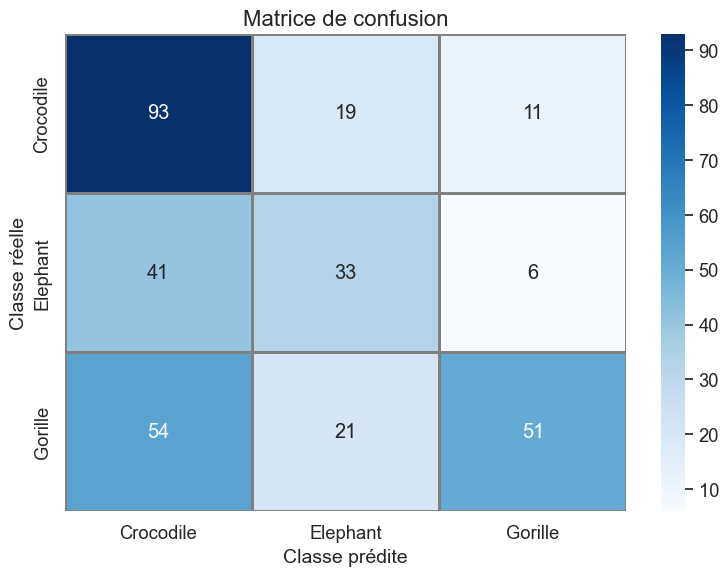

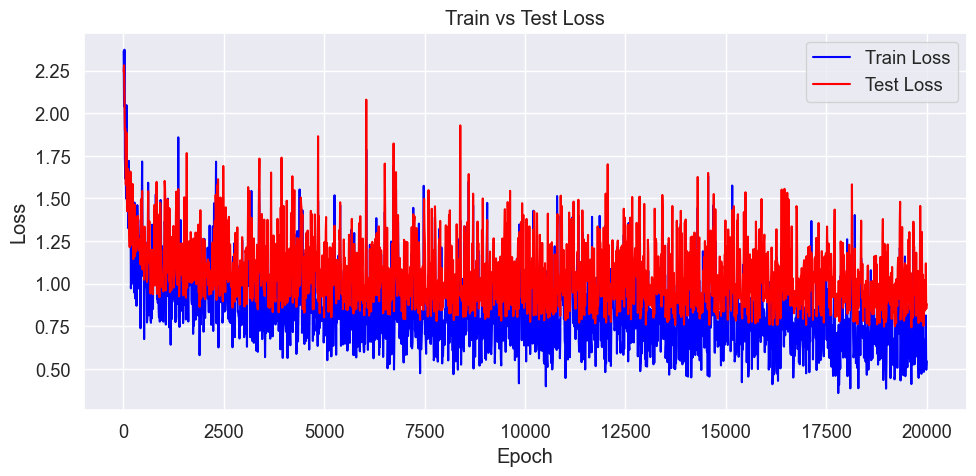

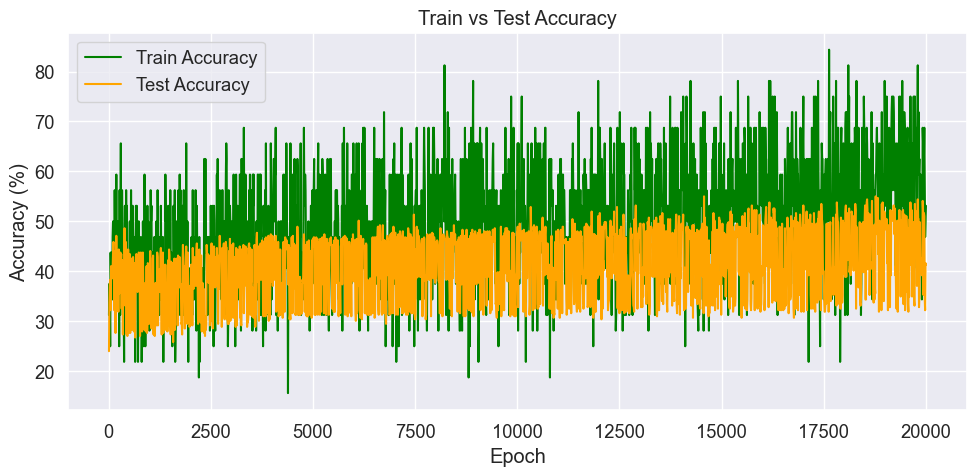

: 

In [ ]:
layer_sizes = [size*size*3, 512, len(classnames_array)]
layer_array = (ctypes.c_int * len(layer_sizes))(*layer_sizes)
model = mlp.create_mlp_model(layer_array, len(layer_sizes) - 1, 10)
mlp.set_logger(logger_callback)

np.random.shuffle(data)
split_index = int(len(data) * 0.8)
data_train = data[:split_index]
data_test = data[split_index:]
X_train = np.array([item[1] for item in data_train], dtype=np.float32)
Y_train = np.array([item[0] for item in data_train], dtype=np.float32)
X_test = np.array([item[1] for item in data_test], dtype=np.float32)
Y_test = np.array([item[0] for item in data_test], dtype=np.float32)

X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_train_c = X_train_reshaped.ctypes.data_as(ctypes.POINTER(ctypes.c_float))
Y_train_c = Y_train.ctypes.data_as(ctypes.POINTER(ctypes.c_float))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))
X_test_c = X_test_reshaped.ctypes.data_as(ctypes.POINTER(ctypes.c_float))
Y_test_c = Y_test.ctypes.data_as(ctypes.POINTER(ctypes.c_float))

epochs = 20000
learning_rate = 0.005
batch_size = 32
csv_path = "log.csv"
with open(csv_path, "w") as csvfile:
        csvfile.truncate()
        csvfile.write("epoch,train_acc,train_loss,test_acc,test_loss\n")
time.sleep(0.2)

mlp.train_mlp_model(model, X_train_c, Y_train_c, len(data_train), epochs, learning_rate, batch_size, X_test_c, Y_test_c, len(data_test), csv_path.encode())

output_dim = len(classnames_array)
matrix = (ctypes.c_int * (output_dim * output_dim))()
mlp.evaluate_confusion_matrix(model, X_test_c, Y_test_c, len(data_test), True)
mlp.get_confusion_matrix(model, matrix)

confusion_np = np.ctypeslib.as_array(matrix).reshape((output_dim, output_dim))
print(confusion_np)
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
ax = sns.heatmap(confusion_np, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=classnames_array, yticklabels=classnames_array,
                 linewidths=1, linecolor='gray', cbar=True)

plt.title("Matrice de confusion", fontsize=16)
plt.xlabel("Classe prédite", fontsize=14)
plt.ylabel("Classe réelle", fontsize=14)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

df = pd.read_csv("log.csv")

plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', color='blue')
plt.plot(df['epoch'], df['test_loss'], label='Test Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train_acc'], label='Train Accuracy', color='green')
plt.plot(df['epoch'], df['test_acc'], label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
mlp.release_mlp_model(model)

In [ ]:
mlp.save_mlp_model(model, b"mlp_trained.bin")

-201418088

In [ ]:
model_loaded = mlp.load_mlp_model(b"mlp_trained.bin")

OSError: [WinError -1073741569] Windows Error 0xc00000ff

In [ ]:
img = Image.open('C:/Users/lgrdp/Downloads/images (10).jpeg').convert("RGB")
img = img.resize(size=(32,32))
img_data = np.array(img) / 255.0

output_array = mlp.predict_mlp_model(model, img_data.ctypes.data_as(ctypes.POINTER(ctypes.c_float)), True)
output_array = ctypes.cast(output_array, ctypes.POINTER(ctypes.c_float * len(classnames_array))).contents
output = list(output_array)
class_index = 0
for i in range(len(output)):
    if output[i] == max(output):
        class_index = i
print('predicted class : ' + classnames_array[class_index])
print(output)


predicted class : zebre
[0.956343948841095, 0.983494222164154, 0.9977808594703674]


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))
Y_train_cat = to_categorical(Y_train, num_classes=len(classnames_array))
Y_test_cat = to_categorical(Y_test, num_classes=len(classnames_array))

def ensure_categorical(Y, num_classes):
    Y = np.array(Y)
    if len(Y.shape) == 1:
        return to_categorical(Y, num_classes)
    elif Y.shape[1] == num_classes:
        return Y 
    else:
        raise ValueError(f"Format inattendu pour Y (shape: {Y.shape})")

Y_train_cat = ensure_categorical(Y_train, len(classnames_array))
Y_test_cat = ensure_categorical(Y_test, len(classnames_array))

model = Sequential([
    Input(shape=(X_train_reshaped.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(classnames_array), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

model.fit(X_train_reshaped, Y_train_cat,
          epochs=200,
          batch_size=32,
          validation_data=(X_test_reshaped, Y_test_cat),
          verbose=2)

predictions = model.predict(X_test_reshaped)
pred_labels = np.argmax(predictions, axis=1)
acc = accuracy_score(Y_test, pred_labels)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

Epoch 1/200
30/30 - 1s - 32ms/step - accuracy: 0.3294 - loss: 2.3289 - val_accuracy: 0.3207 - val_loss: 1.2150
Epoch 2/200
30/30 - 0s - 5ms/step - accuracy: 0.4068 - loss: 1.1156 - val_accuracy: 0.5612 - val_loss: 0.9969
Epoch 3/200
30/30 - 0s - 5ms/step - accuracy: 0.4449 - loss: 1.0289 - val_accuracy: 0.5105 - val_loss: 0.9973
Epoch 4/200
30/30 - 0s - 5ms/step - accuracy: 0.4703 - loss: 1.0187 - val_accuracy: 0.5865 - val_loss: 0.9237
Epoch 5/200
30/30 - 0s - 5ms/step - accuracy: 0.5148 - loss: 0.9672 - val_accuracy: 0.5612 - val_loss: 0.8951
Epoch 6/200
30/30 - 0s - 5ms/step - accuracy: 0.5212 - loss: 0.9647 - val_accuracy: 0.5696 - val_loss: 0.9445
Epoch 7/200
30/30 - 0s - 5ms/step - accuracy: 0.5572 - loss: 0.9203 - val_accuracy: 0.5401 - val_loss: 0.9073
Epoch 8/200
30/30 - 0s - 5ms/step - accuracy: 0.5466 - loss: 0.9039 - val_accuracy: 0.6118 - val_loss: 0.8593
Epoch 9/200
30/30 - 0s - 5ms/step - accuracy: 0.5847 - loss: 0.8632 - val_accuracy: 0.5781 - val_loss: 0.8501
Epoch 10/

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets